In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

In [3]:
import networkx as nx
import numpy as np
import sys; sys.path.append('../')
from anytree import RenderTree
from anytree.cachedsearch import find
import logging
import pickle
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from VRG.src.Tree import TreeNode, create_tree, dasgupta_cost
from VRG.runner import get_clustering

In [18]:
%matplotlib inline

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [6]:
def load_pickle(fname):
    return pickle.load(open(fname, 'rb'))

In [7]:
def read_graph(name: str) -> nx.Graph:
    if name == 'sample':
        g = nx.Graph()
        g.add_nodes_from(range(5), color='blue')
        g.add_nodes_from(range(5, 9), color='red')

        g.add_edges_from([(0, 1), (0, 3), (0, 4),
                          (1, 2), (1, 4), (1, 5),
                          (2, 3), (2, 4), (2, 8),
                          (3, 4),
                          (5, 6), (5, 7), (5, 8),
                          (6, 7), (6, 8),
                          (7, 8)])  # properly labeled
    elif name == 'karate':
        g = nx.karate_club_graph()
    elif name in ('polblogs', 'polbooks', 'football', 'bipartite-10-10'):
        g = nx.read_gml(f'../VRG/input/{name}.gml')
    else:
        path = f'../VRG/input/{name}.g'
        g = nx.read_edgelist(path, nodetype=int, create_using=nx.Graph())
    
    if not nx.is_connected(g):
        nodes_lcc = max(nx.connected_components(g), key=len)
        g = g.subgraph(nodes_lcc).copy()
    
    g = nx.convert_node_labels_to_integers(g, label_attribute='orig_label')
    g.name = name
    logging.error(f'Graph: {name}, n = {g.order():_d}, m = {g.size():_d}.')
    return g

In [8]:
g = read_graph('flights')

Graph: flights, n = 2_905, m = 15_645.


In [9]:
clustering_algs = 'leiden', 'louvain', 'cond', 'spectral', 'infomap', 'labelprop', 'random'
for clustering in clustering_algs:
    clustering = get_clustering(g, outdir=f'../VRG/dumps/trees/{g.name}/', 
                                clustering=clustering, use_pickle=True)

Using existing pickle for 'leiden' clustering

Using existing pickle for 'louvain' clustering

Using existing pickle for 'cond' clustering

Using existing pickle for 'spectral' clustering

Using existing pickle for 'infomap' clustering

Using existing pickle for 'labelprop' clustering

Using existing pickle for 'random' clustering



(get_clustering) Start: Tue Oct  6 16:54:10 2020
End: Tue Oct  6 16:54:10 2020
Elapsed time: 0.0034 seconds
(get_clustering) Start: Tue Oct  6 16:54:10 2020
End: Tue Oct  6 16:54:10 2020
Elapsed time: 0.0025 seconds
(get_clustering) Start: Tue Oct  6 16:54:10 2020
End: Tue Oct  6 16:54:10 2020
Elapsed time: 0.0047 seconds
(get_clustering) Start: Tue Oct  6 16:54:10 2020
End: Tue Oct  6 16:54:10 2020
Elapsed time: 0.0035 seconds
(get_clustering) Start: Tue Oct  6 16:54:10 2020
End: Tue Oct  6 16:54:10 2020
Elapsed time: 0.0041 seconds
(get_clustering) Start: Tue Oct  6 16:54:10 2020
End: Tue Oct  6 16:54:10 2020
Elapsed time: 0.0058 seconds
(get_clustering) Start: Tue Oct  6 16:54:10 2020
End: Tue Oct  6 16:54:10 2020
Elapsed time: 0.0065 seconds


## Compute the dasgupta cost of the trees

In [10]:
glob.glob('../VRG/dumps/trees/karate/*.pkl')

['../VRG/dumps/trees/karate/cond_list.pkl',
 '../VRG/dumps/trees/karate/labelprop_list.pkl',
 '../VRG/dumps/trees/karate/louvain_list.pkl',
 '../VRG/dumps/trees/karate/infomap_list.pkl',
 '../VRG/dumps/trees/karate/leiden_list.pkl',
 '../VRG/dumps/trees/karate/random_list.pkl',
 '../VRG/dumps/trees/karate/spectral_list.pkl',
 '../VRG/dumps/trees/karate/consensus_list.pkl']

In [32]:
def get_dasgupta_df():
    df_path = './dasgupta.csv'
    if os.path.exists(df_path):
        df = pd.read_df(df_path)
    else:
        names = 'karate', 'football', 'polbooks', 'eucore', 'flights', 'polblogs'
        rows = []
        for name in names:
            g = read_graph(name)
            for pickle_file in glob.glob(f'../VRG/dumps/trees/{g.name}/*.pkl'):
                clustering = pickle_file.split('/')[-1].split('_')[0]
                print(clustering, end=' ', flush=True)
                pkl = load_pickle(pickle_file)
                if isinstance(pkl, list):
                    root = create_tree(pkl)
                else:
                    root = pkl
                cost = dasgupta_cost(g=g, root=root)
                row = {'name': name, 'clustering': clustering, 'cost': cost}
                rows.append(row)
        df = pd.DataFrame(rows)
        df.to_csv('./dasgupta.csv', index=False)
    return df

In [33]:
df = pd.read_csv('./dasgupta.csv')

In [38]:
plt.rcParams['figure.figsize'] = (15, 10)

vmin 530.7010681838516 vmax 68386621.95687734
ticklocs array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09])
vmin 530.7010681838516 vmax 68386621.95687734
ticklocs array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09])
vmin 530.7010681838516 vmax 68386621.95687734
ticklocs array([2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05,
       2.e+06, 3.e+06, 4.e+06, 5.e+06, 6.e+06, 7.e+06, 8.e+06, 9.e+06,
       2.e+07, 3.e+07, 4.e+07, 5.e+07, 6.e+07, 7.e+07, 8.e+07, 9.e+07,
       2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08, 8.e+08, 9.e+08,
       2.e+09, 3.e+09, 4.e+09, 5.e+09, 6.e+09, 7.e+09, 8.e+09, 9.e+09])
vmin 530.701068183851

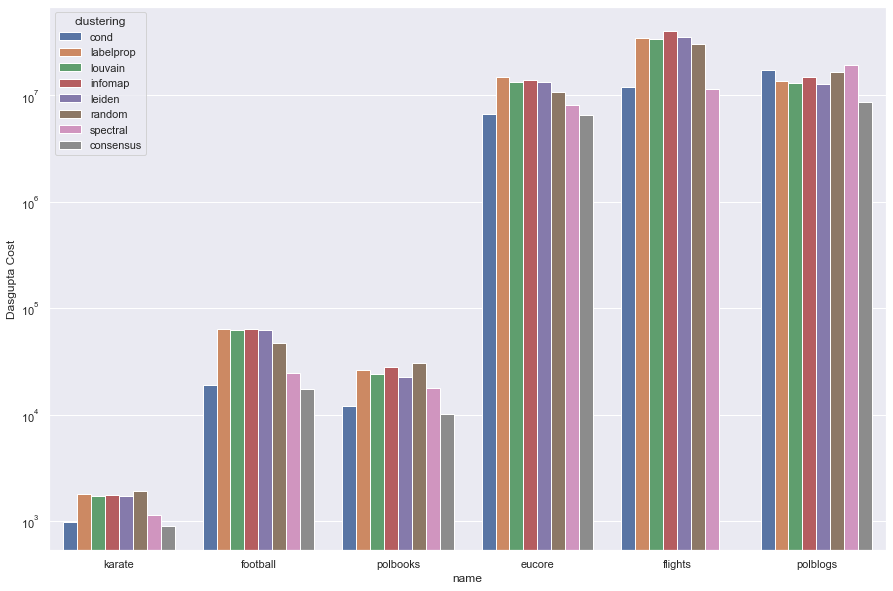

In [43]:
ax = plt.gca();
ax.set_yscale('log');
sns.barplot(x='name', y='cost', hue='clustering', data=df);
ax.set_ylabel('Dasgupta Cost');